In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [51]:
# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings(action='ignore')

In [52]:
data = pd.read_csv('./data/fin_df.csv')
data.head()

,Unnamed: 0,분류명,상대수,여행기간,전체키워드내용,전체컨텐츠내용,검색어,평점,리뷰수
0,0,친구,2,3,"명소,친구와,힐링/휴식,",거슨새미오름,거슨새미오름,4.2,13
1,1,친구,2,3,"명소,친구와,힐링/휴식,",도두 무지개 해안도로,도두 무지개 해안도로,4.4,"3,371"
2,2,친구,2,3,"명소,친구와,힐링/휴식,",봄날카페,봄날카페,4.7,18
3,3,친구,2,3,"명소,친구와,힐링/휴식,",블루하와이리조트,블루하와이리조트,3.9,939
4,4,친구,2,3,"명소,친구와,힐링/휴식,",제주산방산탄산온천,제주산방산탄산온천,4.3,863


In [53]:
import pandas as pd

# '부모' 분류명에 해당하는 데이터 필터링
parent_category_data = data[data['분류명'] == '친구']

# 각 전체 컨텐츠 내용의 갯수 계산
content_counts_in_parent_category = parent_category_data['전체컨텐츠내용'].value_counts().reset_index(name='갯수')

# 결과 출력
print(content_counts_in_parent_category)



           전체컨텐츠내용  갯수
0           제주국제공항  37
1             섭지코지  29
2            성산일출봉  27
3          쇠소깍 명승지  24
4        서귀포 주상절리대  20
..             ...  ..
450  제주 지미스천연아이스크림   1
451        플레이박스VR   1
452        건강과성박물관   1
453        교래자연휴양림   1
454      하도리 철새도래지   1

[455 rows x 2 columns]


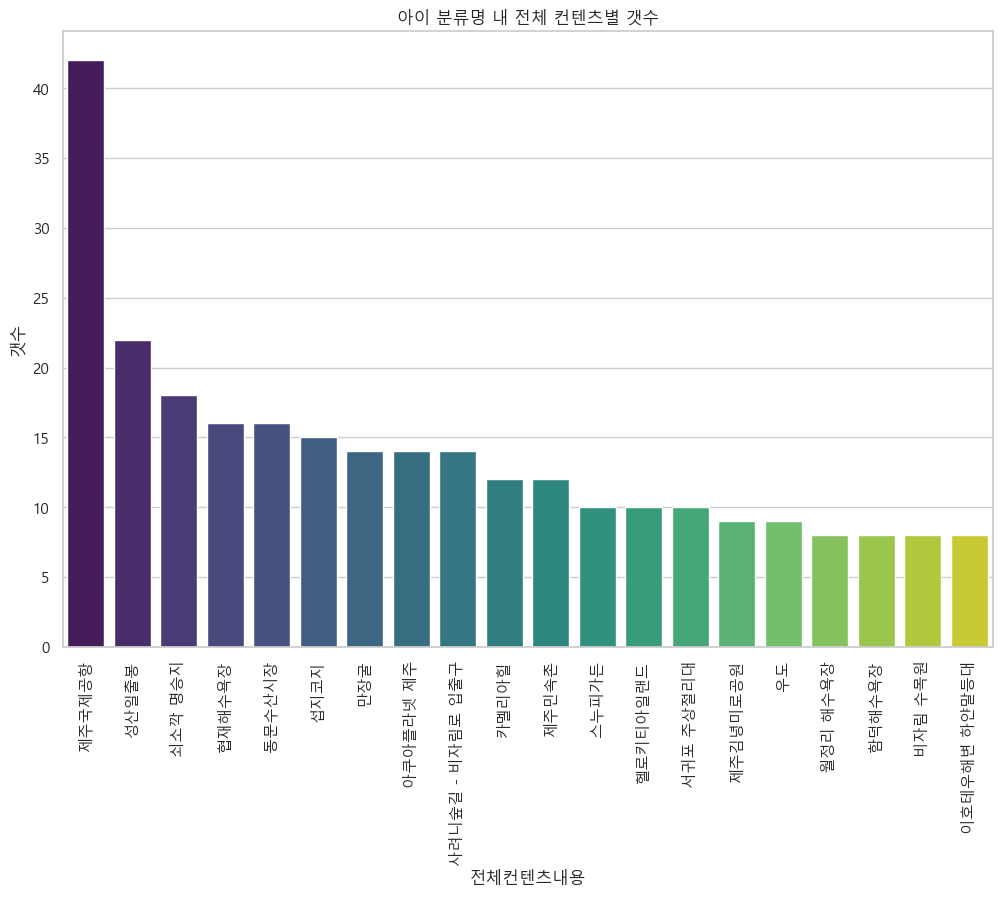

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# '부모' 분류명에 해당하는 데이터 필터링
parent_category_data = data[data['분류명'] == '아이']

# 각 전체 컨텐츠 내용의 갯수 계산
content_counts_in_parent_category = parent_category_data['전체컨텐츠내용'].value_counts().reset_index(name='갯수')

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정 (Windows 환경, MacOS 및 Linux에서는 해당 운영체제에 맞는 폰트 설정 필요)
plt.rc('font', family='Malgun Gothic')

# '부모' 분류명 내에서 전체 컨텐츠별 갯수 계산
content_counts_in_parent_category = parent_category_data['전체컨텐츠내용'].value_counts().reset_index(name='갯수')

# 일부 카테고리만 선택적으로 표시
top_categories = 20  # 표시할 상위 카테고리 개수 조절
selected_categories = content_counts_in_parent_category.head(top_categories)

# 갯수가 0인 경우를 제외하고, 라벨을 세로로 표시하는 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='전체컨텐츠내용', y='갯수', data=selected_categories[selected_categories['갯수'] > 0], palette='viridis')

# 라벨 세로로 표시
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('아이 분류명 내 전체 컨텐츠별 갯수')
plt.xlabel('전체컨텐츠내용')
plt.ylabel('갯수')
plt.show()


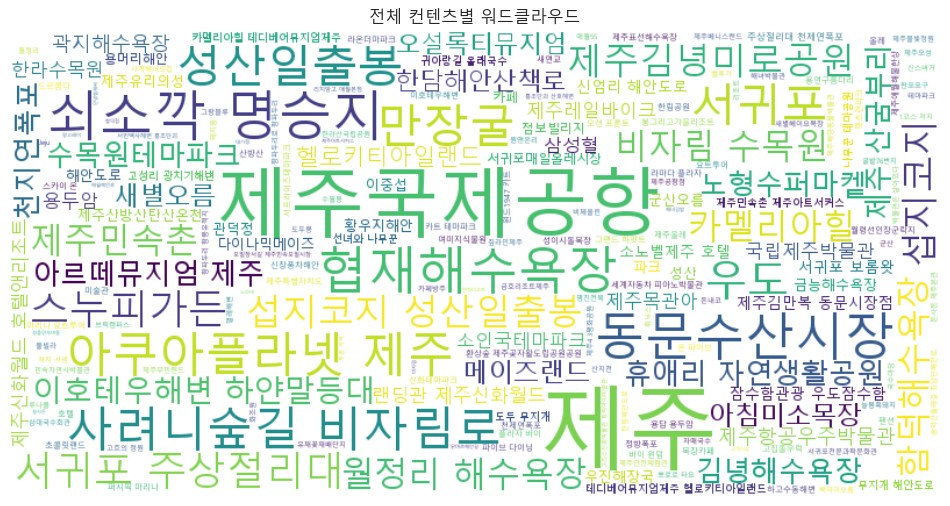

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re

# NaN 값 제거 후 '전체컨텐츠내용' 컬럼 추출
cleaned_data = parent_category_data['전체컨텐츠내용'].dropna()

# 특정 단어 제거 (예: '본점', '제주')
stop_words = ['본점', '입출구']
cleaned_data = cleaned_data.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# '부모' 분류명 내에서 전체 컨텐츠별 워드클라우드 생성
wordcloud_data = " ".join(cleaned_data.astype(str))

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드클라우드 설정
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='white',
    colormap='viridis',
    font_path=font_path,  # 폰트 경로 지정
).generate(wordcloud_data)

# 시각화
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('전체 컨텐츠별 워드클라우드')
plt.show()


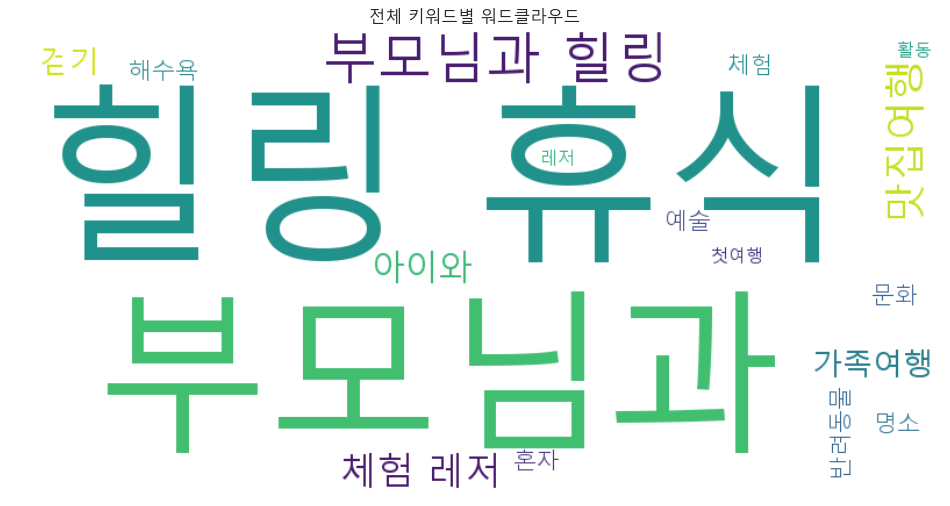

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
import re

# NaN 값 제거 후 '전체키워드내용' 컬럼 추출
cleaned_data = parent_category_data['전체키워드내용'].dropna()

# 중복 내용 제거
cleaned_data = cleaned_data.drop_duplicates()

# 전체 컨텐츠별 워드클라우드 생성
wordcloud_data = " ".join(cleaned_data.astype(str))

# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드클라우드 설정
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='white',
    colormap='viridis',
    font_path=font_path,  # 폰트 경로 지정
).generate(wordcloud_data)

# 시각화
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('전체 키워드별 워드클라우드')
plt.show()
